# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos 
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [17]:
#importamos el módulo que vamos a usar 

import random
import numpy as np
import matplotlib.pyplot as plt

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme. 

Así, para obtener $x \sim U(0,1)$:

In [2]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

0.6443797839638138


Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [3]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

0.7910 0.3347 0.9625 0.5076 0.5998 0.6390 0.9259 0.8151 0.1160 0.2399 


In [4]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

0.5050
0.6506
0.0835
0.3092
0.5055
0.4946
0.9582
0.2456
0.4450
0.3705



La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios. 
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [5]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

0.1344 0.8474 0.7638 0.2551 0.4954 0.4495 0.6516 0.7887 0.0939 0.0283 0.8358 0.4328 0.7623 0.0021 0.4454 0.7215 0.2288 0.9453 0.9014 0.0306 


La función uniform() devuelve un número float incluido entre los valores indicados.

In [6]:
for i in range(10):
    print('%5.4f' %random.uniform(1, 50), end=' ')
print()

2.2468 27.5292 47.0183 19.6790 11.6134 21.6837 2.4230 11.8629 22.4565 25.2948 


La función randint() devuelve un número entero incluido entre los valores indicados. 
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [7]:
for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

-41 -12 -41 73 -44 94 17 -26 -95 6 42 64 -75 -53 61 85 -25 -70 90 -15 


La función randrange() devuelve enteros que van desde un valor inicial a otro final 
separados entre sí un número de valores determinados.

In [8]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

15 15 12 9 12 18 15 3 6 6 12 9 18 12 9 12 18 0 9 3 


La función random.choice() se utiliza para seleccionar elementos al azar de una lista.

In [9]:
Lista = ['Rome','New York','London','Berlin','Moskov', 'Los Angeles','Paris','Madrid','Tokio','Toronto']

In [10]:
Ciudad = random.choice(Lista) 
print ("La ciudad elegida es - ", Ciudad)

La ciudad elegida es -  Paris


In [11]:
for i in range(10):
    Ciudad = random.choice(Lista) 
    print ("La ciudad elegida es - ", Ciudad)

La ciudad elegida es -  Paris
La ciudad elegida es -  London
La ciudad elegida es -  Los Angeles
La ciudad elegida es -  Tokio
La ciudad elegida es -  Los Angeles
La ciudad elegida es -  New York
La ciudad elegida es -  Madrid
La ciudad elegida es -  Tokio
La ciudad elegida es -  New York
La ciudad elegida es -  London


La función sample() devuelve de una lista de elementos un determinado número de elementos diferentes elegidos al azar.

In [12]:
print(random.sample(Lista, 9))

['Tokio', 'Paris', 'Los Angeles', 'Berlin', 'Madrid', 'Rome', 'Toronto', 'Moskov', 'New York']


La función shuffle() 'mezcla' o cambia aleatoriamente el orden de los elementos de una lista antes de realizar la selección de alguno de ellos. 

In [13]:
random.shuffle(Lista)
print('mezcla1', Lista)

mezcla1 ['Los Angeles', 'Madrid', 'Berlin', 'Rome', 'Tokio', 'Moskov', 'New York', 'London', 'Paris', 'Toronto']


## Ejercicio:

1. Elegir al azar una ciudad de la Lista despues de hacer una mezcla.
2. Elegir al azar tres ciudades después de una mezcla.

La función random.gaus() genera una muestra de números aleatorios normalmente distribuidos.

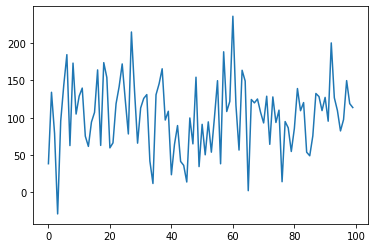

In [27]:
#Generamos una lista de 100 números aleatorios normalmente distribuidos.

nums = []
mu = 100
sigma = 50

for i in range(100):
    temp = random.gauss(mu, sigma)
    nums.append(temp)

plt.plot(nums)
plt.show()

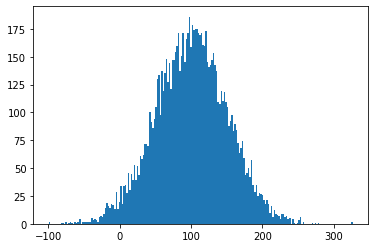

In [15]:
# Construimos el histograma de una muestra de 10000 números aleatorios normalmente distribuidos

nums = []
mu = 100
sigma = 50

for i in range(10000):
    temp = random.gauss(mu, sigma)
    nums.append(temp)

plt.hist(nums, bins = 200)
plt.show()


## Ejercicio:

1. Generar muestras e histograma de las funciones: 
    triangular(), betavariate(), expovariate(), gammavariate(), 
    lognormvariate(), normalvariate(), vonmisesvariate(), paretovariate() y weibullvariate()

## Podemos simular diversas variables aleatorias a partir de un generador de números aleatorios (uniformemente distribuidos). 

### La distribución exponencial

Función de densidad:
    
$f_X (x) = \lambda e^{-\lambda x}$  para $x \geq 0$

y función de distribución:

$F_X (x) = 1 - e^{-\lambda x}$  para $x \geq 0$

Puede ser simulada por el método de inversión mediante el siguiente algoritmo:

0. Hacer $L = -\frac{1}{\lambda}$
1. Generar $U \sim U(0, 1)$
2. Devolver $X = L \cdot Ln(U)$

In [22]:
import random                                   # importamos el módulo random
import numpy as np                              # importamos numpy con un alias (np)
import matplotlib.pyplot as plt                 # ídem
#from random import expovariate, gauss
from statistics import mean, median, variance, stdev      # exportamos funciones especificas de statistics

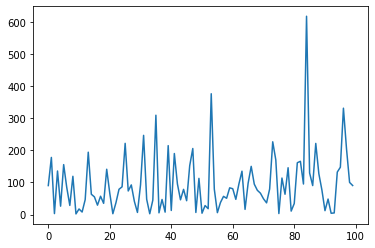

In [12]:
#Generamos una lista de números aleatorios que siguen la distribución exponencial.

nums = []
lamb = 0.01                                     # Párametro de la función exponencial
L = -1.0/lamb #inversa de lambda

for i in range(100):
    temp = L*np.log(random.random())            # Pasos 1 y 2
    nums.append(temp)

plt.plot(nums)
plt.show()

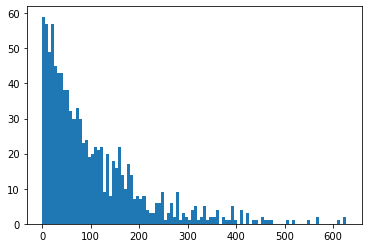

In [18]:
nums = []
lamb = 0.01                                     # Párametro de la función exponencial
L = -1.0/lamb #inversa de lambda

for i in range(1000):
    temp = L*np.log(random.random())
    nums.append(temp)

plt.hist(nums, bins = 100)
plt.show()


### Lo podemos comparar con la salida de la función expovariate()

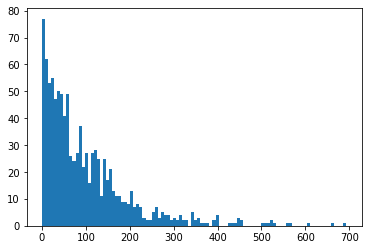

In [19]:
# Construimos el histograma de una muestra de 10000 números aleatorios normalmente distribuidos

nums = []
lamb = 0.01


for i in range(1000):
    temp = random.expovariate(lamb)
    nums.append(temp)

plt.hist(nums, bins = 100)
plt.show()


Que se puede obtener de esta otra manera:

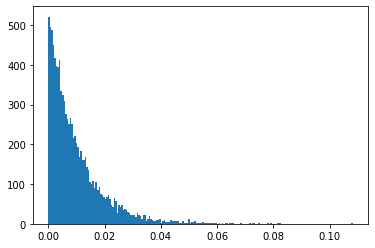

In [7]:
#plt.figure(figsize = (8, 4))
plt.hist([random.expovariate(100) for i in range(10000)], bins = 200)
plt.show()

Y podemos usar el módulo statistics para obtener algunos parámetros del histograma.

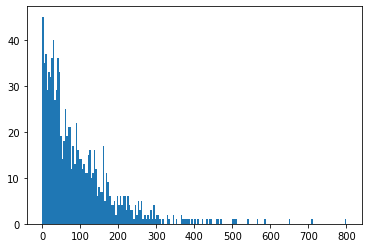

Media: 95.64119.  Mediana: 66.83830.
Varianza: 9510.63796.  Desviación estándar: 97.52250.


In [23]:
#plt.figure(figsize = (8, 4))
sample = [random.expovariate(0.01) for i in range(1000)]
plt.hist(sample, bins = 200)
plt.show()

print(f'Media: {mean(sample):.5f}.  Mediana: {median(sample):.5f}.')
print(f'Varianza: {variance(sample):.5f}.  Desviación estándar: {stdev(sample):.5f}.')

## Ejercicio (03032022):

Simular dos distribuciones de probabilidad (no la normal, no la exponencial), por el método que prefieran.